In [1]:
import pandas as pd

In [2]:
abalone = pd.read_csv("C:/UnxUtils/usr/local/wbin/abalone.data", header=None)

In [3]:
abalone.describe()

,1,2,3,4,5,6,7,8
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [4]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

In [116]:
from statistics import mean
# best fit slope and intercept
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

In [118]:
y = abalone[1] #height 
x = abalone[3] #length

m = best_fit_slope_and_intercept(x,y)
print(m)

(2.3760534760988343, 0.19249367399297174)


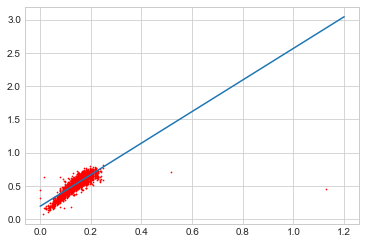

In [119]:
line_length = np.linspace(0, 1.2, 51)

plt.plot(line_length, np.poly1d(np.polyfit(x, y, 1))(line_length) )
plt.scatter(x, y, color = "red", s = 0.5)

In [76]:
abalone2 = abalone.iloc[: , 1:8]

In [77]:
abalone2.head()

,1,2,3,4,5,6,7
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [78]:
result1 = abalone2.corr(method= "pearson")
result1

,1,2,3,4,5,6,7
1,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
2,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330
3,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338
4,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355
5,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617
6,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656
7,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000


In [79]:
result2 = (result1 > 0.95) 
result2

,1,2,3,4,5,6,7
1,True,True,False,False,False,False,False
2,True,True,False,False,False,False,False
3,False,False,True,False,False,False,False
4,False,False,False,True,True,True,True
5,False,False,False,True,True,False,False
6,False,False,False,True,False,True,False
7,False,False,False,True,False,False,True


In [80]:
len_result = len(result2)
for i in range(0, len_result):
    for j in range(0, i ):
        if result2.iloc[i, j]:
            print("The pair ", i, ",", j, " ")
            print("has correlation :", result1.iloc[i,j], ".\n")

The pair  1 , 0  
has correlation : 0.9868115846024959 .

The pair  4 , 3  
has correlation : 0.9694054567034334 .

The pair  5 , 3  
has correlation : 0.9663750782730358 .

The pair  6 , 3  
has correlation : 0.9553554421763328 .



In [96]:
abaloneM = abalone.loc[abalone[0] == "M", :]
abaloneF = abalone.loc[abalone[0] == "F", :]
abaloneI = abalone.loc[abalone[0] == "I", :]


In [97]:
from statsmodels.distributions.empirical_distribution import ECDF

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


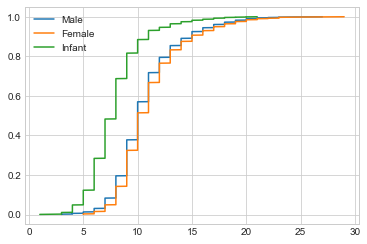

In [109]:
fig = plt.figure()
ax = plt.axes()

ecdfM = ECDF(abaloneM.iloc[ :,8])
ax.plot(ecdfM.x, ecdfM.y, label = 'Male')

ecdfF = ECDF(abaloneF.iloc[ :,8])
ax.plot(ecdfF.x, ecdfF.y, label = "Female")

ecdfI = ECDF(abaloneI.iloc[ :,8])
ax.plot(ecdfI.x, ecdfI.y, label = "Infant")

ax.legend()